In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
projections = pd.read_csv("/Users/Marta/Desktop/diploma/SARIMAX/x_projections.csv")
projections = projections.set_index("Unnamed: 0.1").drop(columns=["Unnamed: 0"])
projections
column_set = [
#     "customer_pain1",
#               "customer_pain2",
#               "customer_pain3",
              "customer_pain4",
    "customer_pain5",
#               "customer_pain6",
            "Average_price_CPI_adjusted_projected",
    "Internet_access_smoothed_predicted", 
#               "Population_smoothed_predicted",
#              "GDP_smoothed_predicted", 
    "CPI_smoothed_predicted"]

column_set = [
    "customer_pain1",
              "customer_pain2",
              "customer_pain3",
              "customer_pain4",
    "customer_pain5",
              "customer_pain6",
#             "Average_price_CPI_adjusted_projected",
#     "Internet_access_smoothed_predicted", 
#               "Population_smoothed_predicted",
#              "GDP_smoothed_predicted", 
#     "CPI_smoothed_predicted"
]


[61.34445906160879, 83.53136068965209, 91.3519259435242, 96.25762194416998, 99.13127811879305]


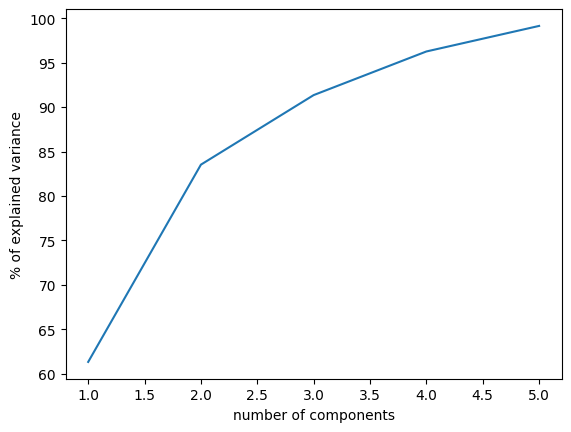

In [16]:
variances = []
rn = range(1, 6)
comps = list(rn)
x = StandardScaler().fit_transform(new_df)
for i in rn:
  pca = PCA(n_components=i)
  components = pca.fit_transform(projections[column_set])
  variances.append(pca.explained_variance_ratio_.sum() * 100)

plt.plot(comps, variances)
plt.xlabel("number of components")
plt.ylabel("% of explained variance")
# plt.title("Explained variance")
print(variances)

In [18]:
pca = PCA(n_components=2)
components = pca.fit_transform(projections[column_set])
pd.DataFrame(components)

,0,1
0,-36.701835,-15.579948
1,-32.202189,-34.985147
2,-39.672674,-33.528216
3,-36.930471,-35.130442
4,-34.267597,-25.405894
...,...,...
151,101.371852,-29.422234
152,101.790516,-35.652233
153,114.990647,-21.733805
154,101.202638,-28.593002


In [23]:
# x_cols = ['cough', 'covid', 'pain', 'pharmacy', 'turniket', 'antidep','Total 2_price', f'T1_price', 
#                           "Internet_access", "Population", "GDP", "CPI"]

pca = PCA(n_components=3)
components = pca.fit_transform(exog[x_cols])

principalDf = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
d = pd.DataFrame(pca.components_, columns = exog[x_cols].columns)
# principalDf
d

,cough,covid,pain,pharmacy,turniket,antidep,Total 2_price,T1_price,Internet_access,Population,GDP,CPI
0,-8.330967e-07,0.000002,0.000007,0.000007,0.000008,0.000007,4.120504e-07,6.521864e-07,0.000006,-1.000000,0.000327,0.000030
1,-3.103098e-03,0.004494,0.003907,-0.000935,-0.001010,0.001060,-1.151757e-06,-2.274715e-05,-0.000363,0.000327,0.999935,-0.008986
2,1.876447e-01,0.173693,0.315833,0.317876,-0.018989,0.138933,8.008780e-03,1.415216e-02,0.231822,0.000033,0.006084,0.812477
